Read file

In [109]:
import pandas as pd

df = pd.read_csv("csv_result-postoperative-patient-data.csv")

df.head(10)

,id,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision
0,1,mid,low,excellent,mid,stable,stable,stable,15,A
1,2,mid,high,excellent,high,stable,stable,stable,10,S
2,3,high,low,excellent,high,stable,stable,mod-stable,10,A
3,4,mid,low,good,high,stable,unstable,mod-stable,15,A
4,5,mid,mid,excellent,high,stable,stable,stable,10,A
5,6,high,low,good,mid,stable,stable,unstable,15,S
6,7,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,8,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,9,mid,high,good,mid,stable,stable,stable,10,S
9,10,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In [110]:
feature_names = list(df.columns[:-1])
feature_names

['id',
 'L-CORE',
 'L-SURF',
 'L-O2',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT']

In [111]:
class_names = df["decision"].unique()
class_names

array(['A', 'S', 'I'], dtype=object)

In [112]:
a_list = df.values.tolist()

a_list

[[1,
  'mid',
  'low',
  'excellent',
  'mid',
  'stable',
  'stable',
  'stable',
  '15',
  'A'],
 [2,
  'mid',
  'high',
  'excellent',
  'high',
  'stable',
  'stable',
  'stable',
  '10',
  'S'],
 [3,
  'high',
  'low',
  'excellent',
  'high',
  'stable',
  'stable',
  'mod-stable',
  '10',
  'A'],
 [4,
  'mid',
  'low',
  'good',
  'high',
  'stable',
  'unstable',
  'mod-stable',
  '15',
  'A'],
 [5,
  'mid',
  'mid',
  'excellent',
  'high',
  'stable',
  'stable',
  'stable',
  '10',
  'A'],
 [6, 'high', 'low', 'good', 'mid', 'stable', 'stable', 'unstable', '15', 'S'],
 [7,
  'mid',
  'low',
  'excellent',
  'high',
  'stable',
  'stable',
  'mod-stable',
  '05',
  'S'],
 [8,
  'high',
  'mid',
  'excellent',
  'mid',
  'unstable',
  'unstable',
  'stable',
  '10',
  'S'],
 [9, 'mid', 'high', 'good', 'mid', 'stable', 'stable', 'stable', '10', 'S'],
 [10,
  'mid',
  'low',
  'excellent',
  'mid',
  'unstable',
  'stable',
  'mod-stable',
  '10',
  'S'],
 [11, 'mid', 'mid', 'goo

Label Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

C = list(map(list, zip(*a_list)))

In [114]:
string = []
for i in range(len(C)):
    if any(type(s) == str for s in C[i]):
        string.append(i)

In [115]:
for i in string:
    le.fit(C[i])
    print(le.classes_)
    C[i] = list(le.transform(C[i]))

['high' 'low' 'mid']
['high' 'low' 'mid']
['excellent' 'good']
['high' 'low' 'mid']
['stable' 'unstable']
['mod-stable' 'stable' 'unstable']
['mod-stable' 'stable' 'unstable']
['05' '07' '10' '15' '?']
['A' 'I' 'S']


In [116]:
C = list(map(list, zip(*C)))

a_list_enc = C

a_list_enc

[[1, 2, 1, 0, 2, 0, 1, 1, 3, 0],
 [2, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [3, 0, 1, 0, 0, 0, 1, 0, 2, 0],
 [4, 2, 1, 1, 0, 0, 2, 0, 3, 0],
 [5, 2, 2, 0, 0, 0, 1, 1, 2, 0],
 [6, 0, 1, 1, 2, 0, 1, 2, 3, 2],
 [7, 2, 1, 0, 0, 0, 1, 0, 0, 2],
 [8, 0, 2, 0, 2, 1, 2, 1, 2, 2],
 [9, 2, 0, 1, 2, 0, 1, 1, 2, 2],
 [10, 2, 1, 0, 2, 1, 1, 0, 2, 2],
 [11, 2, 2, 1, 2, 0, 1, 1, 3, 0],
 [12, 2, 1, 1, 0, 0, 1, 0, 2, 0],
 [13, 0, 0, 0, 0, 1, 1, 2, 3, 0],
 [14, 2, 0, 1, 2, 1, 1, 0, 2, 0],
 [15, 2, 1, 1, 0, 1, 2, 1, 3, 2],
 [16, 0, 0, 0, 0, 1, 1, 2, 2, 0],
 [17, 1, 0, 1, 0, 1, 1, 0, 3, 0],
 [18, 2, 1, 1, 0, 1, 1, 1, 2, 0],
 [19, 2, 0, 1, 2, 1, 1, 2, 3, 0],
 [20, 2, 2, 1, 2, 0, 1, 1, 2, 0],
 [21, 1, 0, 1, 2, 1, 1, 1, 3, 0],
 [22, 1, 2, 0, 0, 1, 1, 2, 2, 2],
 [23, 2, 2, 1, 2, 1, 1, 2, 3, 0],
 [24, 2, 2, 1, 2, 1, 1, 1, 2, 0],
 [25, 0, 0, 1, 2, 0, 1, 0, 2, 0],
 [26, 1, 2, 1, 2, 1, 1, 1, 2, 0],
 [27, 0, 2, 1, 1, 0, 1, 0, 2, 0],
 [28, 1, 2, 0, 0, 0, 1, 0, 2, 0],
 [29, 2, 2, 0, 2, 0, 1, 2, 3, 0],
 [30, 2, 2, 1, 2, 1, 1,

In [117]:
df=pd.DataFrame(data=a_list_enc)
df.to_csv('a_list_enc.csv',index=False)

Normalize

In [118]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('a_list_enc.csv')

In [119]:
scaler = StandardScaler()

scaler.fit(np.float32(df.iloc[:,:-1]))

data_scaled_std = scaler.transform(df.iloc[:,:-1])

data_scaled_std

label = df.iloc[:,9].to_frame()

a_list_enc_norm = np.concatenate([data_scaled_std, label], axis=1)

a_list_enc_norm

array([[-1.71291154,  0.68111491, -0.44335508, -1.04547753,  0.74761983,
        -1.        , -0.20327891, -0.03179815,  1.23743685,  0.        ],
       [-1.67441914,  0.68111491, -1.73051498, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -0.03179815, -0.35355339,  2.        ],
       [-1.63592675, -2.04334474, -0.44335508, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -1.46271484, -0.35355339,  0.        ],
       [-1.59743435,  0.68111491, -0.44335508,  0.95650072, -1.38843682,
        -1.        ,  3.45574144, -1.46271484,  1.23743685,  0.        ],
       [-1.55894196,  0.68111491,  0.84380482, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -0.03179815, -0.35355339,  0.        ],
       [-1.52044957, -2.04334474, -0.44335508,  0.95650072,  0.74761983,
        -1.        , -0.20327891,  1.39911854,  1.23743685,  2.        ],
       [-1.48195717,  0.68111491, -0.44335508, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -1.46271484

In [120]:
a_list_enc_norm = pd.DataFrame(data=a_list_enc_norm)

a_list_enc_norm.to_csv('a_list_enc_norm.csv',index=False)

Divide train test

In [121]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('a_list_enc_norm.csv')

X_data = np.array(df.iloc[:,:9])

Y_data = df.iloc[:,-1].to_numpy()



X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.33, random_state = 42)

In [122]:
print(X_train,"\n", Y_train)

[[-1.36647999  0.68111491 -0.44335508 -1.04547753  0.74761983  1.
  -0.20327891 -1.46271484 -0.35355339]
 [ 0.90457126  0.68111491  0.84380482 -1.04547753 -1.38843682 -1.
  -0.20327891 -0.03179815 -0.35355339]
 [-1.52044957 -2.04334474 -0.44335508  0.95650072  0.74761983 -1.
  -0.20327891  1.39911854  1.23743685]
 [-0.09623099 -2.04334474 -1.73051498  0.95650072 -1.38843682  1.
  -0.20327891 -0.03179815  1.23743685]
 [ 0.09623099  0.68111491  0.84380482 -1.04547753  0.74761983  1.
  -0.20327891 -0.03179815 -0.35355339]
 [-1.09703323 -0.68111491 -1.73051498  0.95650072 -1.38843682  1.
  -0.20327891 -1.46271484  1.23743685]
 [ 0.0192462  -0.68111491  0.84380482  0.95650072  0.74761983  1.
  -0.20327891 -0.03179815 -0.35355339]
 [-0.40417014 -0.68111491  0.84380482 -1.04547753 -1.38843682 -1.
  -0.20327891 -1.46271484 -0.35355339]
 [-1.44346478 -2.04334474  0.84380482 -1.04547753  0.74761983  1.
   3.45574144 -0.03179815 -0.35355339]
 [ 1.2894952   0.68111491  0.84380482 -1.04547753  0.74

Running IBL(K nearest neighbor)

In [123]:
from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
clf = KNeighborsClassifier(n_neighbors=7) 
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [125]:
predictions = clf.predict(X_test)
predictions

array([2., 2., 2., 2., 2., 0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.])

In [126]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

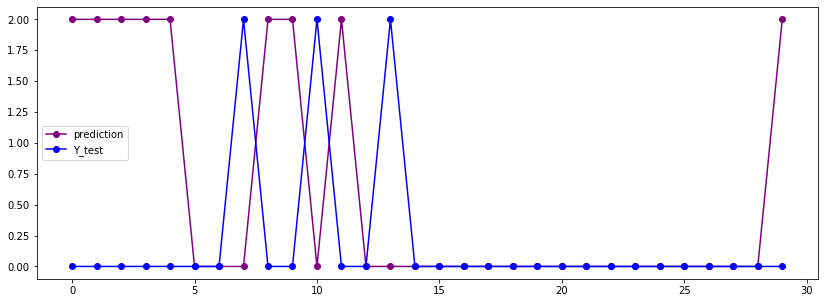

In [127]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (14,5))
plt.plot(predictions, label = 'prediction', color = "purple", marker = "o")
plt.plot(Y_test, label = 'Y_test',color = "blue", marker = "o")
plt.legend()

In [128]:
print(accuracy_score(Y_test, predictions))

0.6


In [129]:
print(clf.kneighbors_graph(X_test).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [130]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob)

[[0.42857143 0.         0.57142857]
 [0.42857143 0.         0.57142857]
 [0.42857143 0.         0.57142857]
 [0.42857143 0.         0.57142857]
 [0.14285714 0.         0.85714286]
 [0.85714286 0.         0.14285714]
 [0.71428571 0.         0.28571429]
 [0.85714286 0.         0.14285714]
 [0.42857143 0.         0.57142857]
 [0.42857143 0.         0.57142857]
 [0.85714286 0.         0.14285714]
 [0.42857143 0.         0.57142857]
 [0.42857143 0.14285714 0.42857143]
 [0.85714286 0.         0.14285714]
 [0.71428571 0.         0.28571429]
 [0.71428571 0.         0.28571429]
 [0.57142857 0.         0.42857143]
 [0.57142857 0.         0.42857143]
 [0.85714286 0.         0.14285714]
 [0.42857143 0.14285714 0.42857143]
 [0.85714286 0.         0.14285714]
 [0.71428571 0.         0.28571429]
 [0.71428571 0.         0.28571429]
 [0.71428571 0.         0.28571429]
 [0.42857143 0.14285714 0.42857143]
 [0.71428571 0.         0.28571429]
 [0.71428571 0.         0.28571429]
 [0.71428571 0.         0.28

1)

In [131]:
acc_n = []

clf_n = KNeighborsClassifier(n_neighbors=1) 
clf_n.fit(X_train, Y_train)
predictions_n = clf_n.predict(X_test)
accuracy_n = accuracy_score(Y_test, predictions_n)
acc_n.append(accuracy_n)

clf_n = KNeighborsClassifier(n_neighbors=5) 
clf_n.fit(X_train, Y_train)
predictions_n = clf_n.predict(X_test)
accuracy_n = accuracy_score(Y_test, predictions_n)
acc_n.append(accuracy_n)

clf_n = KNeighborsClassifier(n_neighbors=9) 
clf_n.fit(X_train, Y_train)
predictions_n = clf_n.predict(X_test)
accuracy_n = accuracy_score(Y_test, predictions_n)
acc_n.append(accuracy_n)

clf_n = KNeighborsClassifier(n_neighbors=15) 
clf_n.fit(X_train, Y_train)
predictions_n = clf_n.predict(X_test)
accuracy_n = accuracy_score(Y_test, predictions_n)
acc_n.append(accuracy_n)

acc_n

[0.5333333333333333, 0.6333333333333333, 0.6, 0.6666666666666666]

([<matplotlib.axis.XTick at 0x22d5f15fa08>,
 <a list of 4 Text xticklabel objects>)

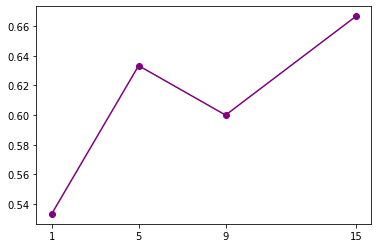

In [132]:
x_axis = [1,5,9,15]
plt.plot(x_axis,acc_n, color = "purple", marker = "o")
plt.xticks(x_axis)

2)

In [133]:
acc_w1 = []

clf_w = KNeighborsClassifier(n_neighbors=1) 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w1.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=5) 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w1.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=9) 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w1.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=15) 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w1.append(accuracy_w)

acc_w1

[0.5333333333333333, 0.6333333333333333, 0.6, 0.6666666666666666]

In [134]:
acc_w2 = []

clf_w = KNeighborsClassifier(n_neighbors=1, weights = 'distance') 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w2.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=5, weights = 'distance') 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w2.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=9, weights = 'distance') 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w2.append(accuracy_w)

clf_w = KNeighborsClassifier(n_neighbors=15, weights = 'distance') 
clf_w.fit(X_train, Y_train)
predictions_w = clf_w.predict(X_test)
accuracy_w = accuracy_score(Y_test, predictions_w)
acc_w2.append(accuracy_w)

acc_w2

[0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6]

([<matplotlib.axis.XTick at 0x22d5f1210c8>,
 <a list of 4 Text xticklabel objects>)

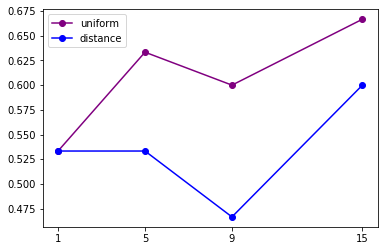

In [135]:
x_axis = [1,5,9,15]
plt.plot(x_axis,acc_w1, label = 'uniform', color = "purple", marker = "o")
plt.plot(x_axis,acc_w2, label = 'distance', color = "blue", marker = "o")
plt.legend()
plt.xticks(x_axis)

3)

In [136]:
acc_p1 = []

clf_p = KNeighborsClassifier(n_neighbors=1, p=1) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p1.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=5, p=1) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p1.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=9, p=1) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p1.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=15, p=1) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p1.append(accuracy_p)

acc_p1

[0.5666666666666667, 0.6, 0.7333333333333333, 0.7333333333333333]

In [137]:
acc_p2 = []

clf_p = KNeighborsClassifier(n_neighbors=1) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p2.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=5) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p2.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=9) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p2.append(accuracy_p)

clf_p = KNeighborsClassifier(n_neighbors=15) 
clf_p.fit(X_train, Y_train)
predictions_p = clf_p.predict(X_test)
accuracy_p = accuracy_score(Y_test, predictions_p)
acc_p2.append(accuracy_p)

acc_p2

[0.5333333333333333, 0.6333333333333333, 0.6, 0.6666666666666666]

([<matplotlib.axis.XTick at 0x22d5f184388>,
 <a list of 4 Text xticklabel objects>)

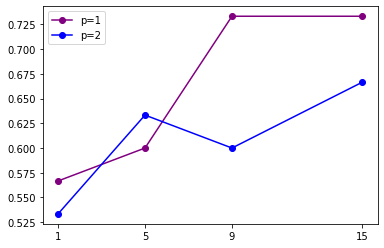

In [138]:
x_axis = [1,5,9,15]
plt.plot(x_axis,acc_p1, label = 'p=1', color = "purple", marker = "o")
plt.plot(x_axis,acc_p2, label = 'p=2', color = "blue", marker = "o")
plt.legend()
plt.xticks(x_axis)



Running AdaBoost

In [139]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier() 
clf.fit(X_train, Y_train) 
predictions = clf.predict(X_test)
predictions

array([2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 1., 2., 0., 0., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 2., 2., 2., 0., 0., 2., 0.])

In [140]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob)

[[0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.50686647 0.00120688 0.49192665]
 [0.56448418 0.43455634 0.00095948]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.50686647 0.00120688 0.49192665]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.04529524 0.9108443  0.04386046]
 [0.49858304 0.001199   0.50021796]
 [0.50686647 0.00120688 0.49192665]
 [0.90012967 0.07698904 0.02288129]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.50686647 0.00120688 0.49192665]
 [0.50686647 0.00120688 0.49192665]
 [0.50686647 0.00120688 0.49192665]
 [0.50686647 0.00120688 0.49192665]
 [0.50686647 0.00120688 0.49192665]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.49858304 0.001199   0.50021796]
 [0.50686647 0.00120688 0.49192665]
 [0.50686647 0.00120688 0.49

In [141]:
accuracy_score(Y_test, predictions)

0.36666666666666664

1)

In [142]:
acc_e = []

clf_e = AdaBoostClassifier(n_estimators = 3) 
clf_e.fit(X_train, Y_train) 
predictions_e = clf_e.predict(X_test)
accuracy_e = clf_e.score(X_test, Y_test) 
acc_e.append(accuracy_e)

clf_e = AdaBoostClassifier(n_estimators = 7) 
clf_e.fit(X_train, Y_train) 
predictions_e = clf_e.predict(X_test)
accuracy_e = clf_e.score(X_test, Y_test) 
acc_e.append(accuracy_e)

clf_e = AdaBoostClassifier(n_estimators = 10) 
clf_e.fit(X_train, Y_train) 
predictions_e = clf_e.predict(X_test)
accuracy_e = clf_e.score(X_test, Y_test) 
acc_e.append(accuracy_e)

clf_e = AdaBoostClassifier(n_estimators = 50) 
clf_e.fit(X_train, Y_train) 
predictions_e = clf_e.predict(X_test)
accuracy_e = clf_e.score(X_test, Y_test) 
acc_e.append(accuracy_e)

clf_e = AdaBoostClassifier(n_estimators = 100) 
clf_e.fit(X_train, Y_train) 
predictions_e = clf_e.predict(X_test)
accuracy_e = clf_e.score(X_test, Y_test) 
acc_e.append(accuracy_e)

acc_e

[0.36666666666666664,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.3333333333333333]

([<matplotlib.axis.XTick at 0x22d5f289d48>,
 <a list of 5 Text xticklabel objects>)

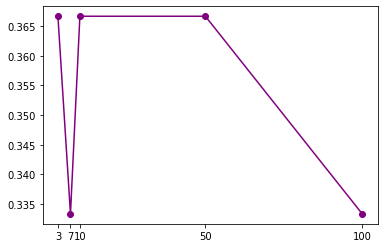

In [143]:
x_axis = [3,7,10,50,100]
plt.plot(x_axis, acc_e, color = "purple", marker = "o")
plt.xticks(x_axis)

Running Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0) 
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
predictions

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [145]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob)

[[0.51217368 0.04328115 0.44454517]
 [0.53687544 0.04316793 0.41995663]
 [0.63567491 0.04081198 0.32351311]
 [0.53025696 0.09717675 0.37256629]
 [0.46537824 0.02140154 0.51322023]
 [0.68299782 0.02714022 0.28986196]
 [0.66599135 0.03553702 0.29847163]
 [0.71088393 0.04210831 0.24700776]
 [0.43103474 0.03614437 0.53282088]
 [0.546837   0.03150635 0.42165665]
 [0.67262987 0.0386924  0.28867773]
 [0.53059809 0.04277171 0.4266302 ]
 [0.67638697 0.04386036 0.27975268]
 [0.68924884 0.03482756 0.2759236 ]
 [0.60540384 0.02044934 0.37414682]
 [0.51985894 0.0188602  0.46128086]
 [0.58882522 0.03035618 0.3808186 ]
 [0.55444601 0.03092343 0.41463056]
 [0.74136582 0.03146378 0.2271704 ]
 [0.60125978 0.04892722 0.34981299]
 [0.75101433 0.02648777 0.2224979 ]
 [0.74692342 0.02648777 0.22658881]
 [0.66438185 0.02414339 0.31147476]
 [0.62090257 0.04076069 0.33833674]
 [0.53417129 0.04198764 0.42384107]
 [0.57857536 0.02705574 0.3943689 ]
 [0.6872043  0.02557143 0.28722426]
 [0.6896311  0.0253555  0.28

In [146]:
accuracy_score(Y_test, predictions)

0.8333333333333334

1)

In [147]:
acc_r = []

clf_r = RandomForestClassifier(n_estimators=5,max_depth=2, random_state=0) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_r.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_r.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=0) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_r.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_r.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_r.append(accuracy_r)

acc_r

[0.7, 0.8333333333333334, 0.8, 0.8, 0.8333333333333334]

([<matplotlib.axis.XTick at 0x22d5f307188>,
 <a list of 5 Text xticklabel objects>)

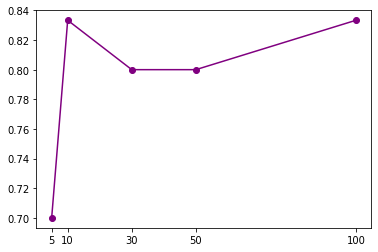

In [148]:
x_axis = [5,10,30,50,100]
plt.plot(x_axis, acc_r, color = "purple", marker = "o")
plt.xticks(x_axis)

2)

In [149]:
acc_oob = []

clf_r = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score = True) 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_oob.append(accuracy_r)
print(f'Out-of-bag score estimate: {clf_r.oob_score_:.3}')

clf_r = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,oob_score = False)
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_oob.append(accuracy_r)

acc_oob

Out-of-bag score estimate: 0.583


[0.8333333333333334, 0.8333333333333334]

([<matplotlib.axis.XTick at 0x22d5f36b288>,
 <a list of 2 Text xticklabel objects>)

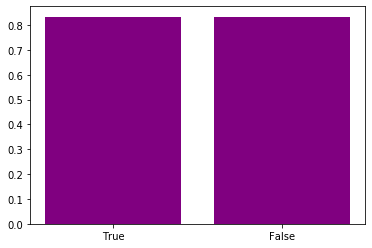

In [150]:
x_axis = ['True','False']
plt.bar(x_axis, acc_oob, color = "purple")
plt.xticks(x_axis)

3)

In [151]:
acc_f = []

clf_r = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0, max_features = 'auto') 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_f.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0,max_features = 'sqrt') 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_f.append(accuracy_r)

clf_r = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0, max_features = 'log2') 
clf_r.fit(X_train, Y_train)
predictions_r = clf_r.predict(X_test)
accuracy_r = accuracy_score(Y_test, predictions_r)
acc_f.append(accuracy_r)

acc_f

[0.8333333333333334, 0.8333333333333334, 0.8333333333333334]

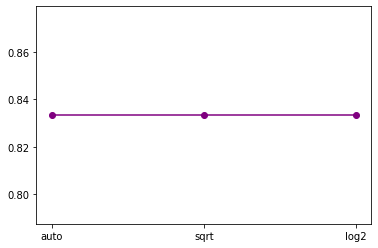

In [152]:
x_axis = ['auto','sqrt','log2']
plt.plot(x_axis, acc_f, color = "purple", marker = "o")

Running SVM

1)

In [153]:
from sklearn import svm
clf = svm.SVC() 
clf.fit(X_train, Y_train) 
predictions = clf.predict(X_test)
predictions

array([0., 2., 0., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [154]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.6333333333333333

2)

In [155]:
acc_k =[]

clf_k = svm.SVC(kernel='linear') 
clf_k.fit(X_train, Y_train) 
predictions_k = clf_k.predict(X_test)
accuracy_k = accuracy_score(Y_test, predictions_k)
acc_k.append(accuracy_k)

clf_k = svm.SVC(kernel='poly') 
clf_k.fit(X_train, Y_train) 
predictions_k = clf_k.predict(X_test)
accuracy_k = accuracy_score(Y_test, predictions_k)
acc_k.append(accuracy_k)

clf_k = svm.SVC(kernel='rbf') 
clf_k.fit(X_train, Y_train) 
predictions_k = clf_k.predict(X_test)
accuracy_k = accuracy_score(Y_test, predictions_k)
acc_k.append(accuracy_k)

clf_k = svm.SVC(kernel='sigmoid') 
clf_k.fit(X_train, Y_train) 
predictions_k = clf_k.predict(X_test)
accuracy_k = accuracy_score(Y_test, predictions_k)
acc_k.append(accuracy_k)


acc_k

[0.5, 0.8666666666666667, 0.6333333333333333, 0.6333333333333333]

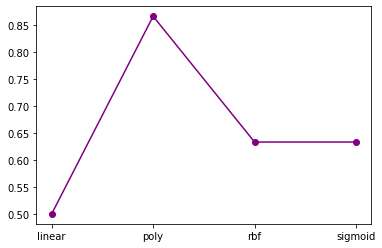

In [156]:
x_axis = ['linear','poly','rbf','sigmoid']
plt.plot(x_axis, acc_k, color = "purple", marker = "o")